In [138]:
import pandas as pd
import numpy as np
from more_itertools import unique_everseen
import matplotlib.pylab as plt

In [84]:
listingSum = pd.read_csv("listingSum.csv")
reviewSum = pd.read_csv("reviewSum.csv")
review = pd.read_csv("reviews.csv")
listing = pd.read_csv("listings.csv")

In [3]:
listingSum
reviewSum

,listing_id,date
0,2595,2009-11-21
1,2595,2009-12-05
2,2595,2009-12-10
3,2595,2010-04-09
4,2595,2010-05-25
5,2595,2012-05-07
6,2595,2012-05-17
7,2595,2012-08-18
8,2595,2013-05-20
9,2595,2014-05-21


In [85]:
reviewSum['year'] = pd.DatetimeIndex(reviewSum['date']).year
listingSum['year'] = pd.DatetimeIndex(listingSum['last_review']).year
review['year'] = pd.DatetimeIndex(review['date']).year
listing['year'] = pd.DatetimeIndex(listing['last_review']).year

In [5]:
filterNoReview=listingSum['number_of_reviews'] != 0
filtered_listingSum = listingSum[filterNoReview]
filtered_listingSum
filtered_listingSum['host_id'].nunique()

20663

In [6]:
review['reviewer_id'].nunique()

762629

In [7]:
reviewListingCount = reviewSum.groupby('listing_id').count()
reviewListingCount

,date,year
listing_id,,
2595,48,48
3831,408,408
5121,50,50
5136,2,2
5178,505,505
5203,118,118
5803,200,200
6848,181,181
6990,234,234


In [8]:
reviewListingCount['date'].mean()

30.742780955054208

In [9]:
reviewYearCount = reviewSum.groupby('year').count()
reviewYearCount

,listing_id,date
year,,
2009,92,92
2010,598,598
2011,2570,2570
2012,5533,5533
2013,10973,10973
2014,21177,21177
2015,41636,41636
2016,72079,72079
2017,103804,103804


In [10]:
listingYearCount = filtered_listingSum.groupby('year').count()
listingYearCount

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
year,,,,,,,,,,,,,,,,,,
2010.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2011.0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0
2012.0,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,0
2013.0,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,0
2014.0,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,0
2015.0,995,992,995,992,995,995,995,995,995,995,995,995,995,995,995,995,995,0
2016.0,1659,1657,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,0
2017.0,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636,1
2018.0,2119,2119,2119,2118,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,0


In [11]:
hostNode = set(filtered_listingSum['host_id'])
userNode = set(review['reviewer_id'])

In [12]:
len(hostNode)

20663

In [13]:
len(userNode)

762629

In [65]:
totalNode = hostNode.union(userNode)
len(totalNode)

781821

In [14]:
userAndHost = 0
for u in userNode:
    if u in hostNode:
        userAndHost += 1
userAndHost

1471

In [ ]:
# for i in range(len(review['listing_id'])):
#     if review['listing_id'][i] in set(filtered_listingSum['id']):
#         review.loc['host_id', i] = filtered_listingSum.loc[filtered_listingSum['id'] == review['listing_id'][i], 'host_id'].item()
# review

In [60]:
edgeSet = set()
for i in range(len(review['reviewer_id']) - 2):
    edgeSet.add((filtered_listingSum.loc[filtered_listingSum['id'] == review['listing_id'][i], 'host_id'].item(), int(review['reviewer_id'][i])))
len(edgeSet)

853283

In [63]:
uEdgeSet = set(unique_everseen(edgeSet, key=frozenset))
len(uEdgeSet)

853268

In [68]:
listingSum2019 = filtered_listingSum[filtered_listingSum['year'] == 2019]
listingSum2020 = filtered_listingSum[filtered_listingSum['year'] == 2020] 
listingSum2021 = filtered_listingSum[filtered_listingSum['year'] == 2021]


3866

In [86]:
review

,listing_id,id,date,reviewer_id,reviewer_name,comments,year
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...,2009
1,2595,19176,2009-12-05,53267,Cate,Great experience.,2009
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...,2009
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en...",2010
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...,2010
5,2595,1238204,2012-05-07,1783688,Sergey,Hi to everyone!\r<br/>Would say our greatest c...,2012
6,2595,1293632,2012-05-17,1870771,Loïc,"Jennifer was very friendly and helpful, and he...",2012
7,2595,2022498,2012-08-18,2124102,Melanie,This apartment is like a real castle old and u...,2012
8,2595,4682989,2013-05-20,496053,Eric,Jennifer's place was in a great midtown locati...,2013
9,2595,13193832,2014-05-21,13685934,Gerald,Jennifer is a very nice host. Everything is cl...,2014


In [99]:
review2019 = review[review['year'] == 2019].reset_index()
review2020 = review[review['year'] == 2020].reset_index()
review2021 = review[review['year'] == 2021].reset_index()

In [100]:
len(review2019)

211277

In [101]:
len(review2020)

91961

In [102]:
len(review2021)

161795

In [103]:
userNode2019 = set(review2019['reviewer_id'])
userNode2020 = set(review2020['reviewer_id'])
userNode2021 = set(review2021['reviewer_id'])

In [104]:
print("Length of userNode 2019: %d, userNode 2020: %d, userNode 2021: %d" % (len(userNode2019), len(userNode2020), len(userNode2021)))

Length of userNode 2019: 197159, userNode 2020: 78562, userNode 2021: 138752


In [107]:
edgeSet2019 = set()
edgeSet2020 = set()
edgeSet2021 = set()
for i in range(len(review2019['reviewer_id']) - 2):
    edgeSet2019.add((filtered_listingSum.loc[filtered_listingSum['id'] == review2019['listing_id'][i], 'host_id'].item(),
                     int(review2019['reviewer_id'][i])))
    
for i in range(len(review2020['reviewer_id']) - 2):
    edgeSet2020.add((filtered_listingSum.loc[filtered_listingSum['id'] == review2020['listing_id'][i], 'host_id'].item(), 
                     int(review2020['reviewer_id'][i])))
    
for i in range(len(review2021['reviewer_id']) - 2):
    edgeSet2021.add((filtered_listingSum.loc[filtered_listingSum['id'] == review2021['listing_id'][i], 'host_id'].item(), 
                     int(review2021['reviewer_id'][i])))

In [108]:
print("Length of edgeSet 2019: %d, edgeSet 2020: %d, edgeSet 2021: %d" % (len(edgeSet2019), len(edgeSet2020), len(edgeSet2021)))

Length of edgeSet 2019: 207982, edgeSet 2020: 88190, edgeSet 2021: 157463


In [115]:
userNode19and20 = userNode2019.union(userNode2020)
userNode20and21 = userNode2021.union(userNode2020)
userNode19and21 = userNode2019.union(userNode2021)
len(userNode19and20)

270915

In [114]:
userNode19and20and21 = userNode19and20.union(userNode2021)
len(userNode19and20and21)

398632

In [116]:
len(userNode19and21)

331006

In [132]:
reviewUserCount = review.groupby('reviewer_id').count()
degree = list(reviewUserCount['id'])
degree.sort(reverse=True)
degree

[67,
 58,
 51,
 49,
 47,
 45,
 42,
 41,
 40,
 38,
 38,
 37,
 37,
 37,
 37,
 36,
 36,
 36,
 36,
 35,
 35,
 34,
 33,
 33,
 32,
 32,
 31,
 31,
 30,
 29,
 29,
 28,
 28,
 28,
 27,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,


In [134]:
degreeDict = {}
for i in degree:
    if i in degreeDict.keys():
        degreeDict[i] += 1
    else:
        degreeDict[i] = 1
degreeDict

{67: 1,
 58: 1,
 51: 1,
 49: 1,
 47: 1,
 45: 1,
 42: 1,
 41: 1,
 40: 1,
 38: 2,
 37: 4,
 36: 4,
 35: 2,
 34: 1,
 33: 2,
 32: 2,
 31: 2,
 30: 1,
 29: 2,
 28: 3,
 27: 1,
 26: 4,
 25: 3,
 24: 7,
 23: 9,
 22: 3,
 21: 11,
 20: 12,
 19: 7,
 18: 11,
 17: 26,
 16: 21,
 15: 29,
 14: 45,
 13: 76,
 12: 75,
 11: 98,
 10: 142,
 9: 193,
 8: 301,
 7: 469,
 6: 879,
 5: 1739,
 4: 3847,
 3: 11370,
 2: 53134,
 1: 690083}

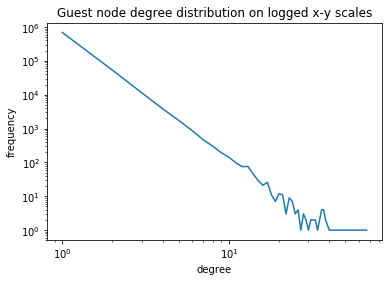

In [143]:
lists = sorted(degreeDict.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.title('Guest node degree distribution on logged x-y scales')
plt.xlabel('degree')
plt.ylabel('frequency')
plt.xscale('log')
plt.yscale('log')
plt.show()

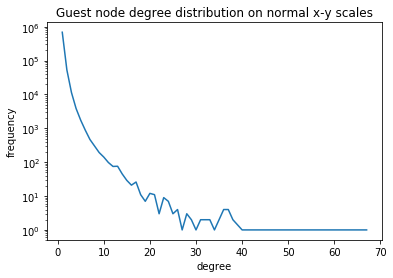

In [144]:
plt.plot(x, y)
plt.title('Guest node degree distribution on normal x-y scales')
plt.xlabel('degree')
plt.ylabel('frequency')
plt.yscale('log')
plt.show()